<h2>Pre-class Work</h2>

<h3>Exercise 15.2</h3>

Consider a dataset in two dimensions where the data lies on the circumference of a circle of unit radius. What would be the effect of using PCA on this dataset, in which we attempt to reduce the dimensionality to 1? Suggest an alternative one dimensional representation of the data.

<h3>Solution</h3>

If the data points all lie on the circumference of a circle, then using PCA would be ineffective since PCA attempts to maximize the variance of the data (where variation is the sum of squared distances between the line and the data points divided by the sample size minus 1), while simultaneously minimizing the sum of distances between the data point and their orthogonal projections onto the potential PC line.

Assuming that the data points are distributed evenly throughout the circular circumference (so there isn't a side with greater weightage), any rotation would still result in the same eigenvalues, and so the PC line will not return any significant results that could help us to identify properties that best explain the data.

An alternative 1D representation of the data would be to consider the angles of the data points to the origin of the circle and assign different values/weights to different angles when transforming the data to 1D.


<h3>Eigenfashion:</h3>

Read the articles at http://blog.thehackerati.com/post/126701202241/eigenstyle and http://joelgrus.com/2013/06/24/t-shirts-feminism-parenting-and-data-science-part-2-eigenshirts/.

Now find the datasets from Image net, as given at the bottom. They contain examples of Jerseys, Shirts, Men’s clothing and Women’s clothing. Decide on an interesting binary classifier to build (e.g. men’s shirt vs women’s shirt, or Jerseys vs Shirts), and choose at least 200 images suitable for building a such a classifier.

Resize and crop all the images programmatically so that they all have the same dimensionality.

Now perform a PCA analysis of your dataset. How many eigenvectors should you use for a reduced representation? Give a few examples of what your original images look like under your new representation.

To answer this question you might find the following tutorial useful. http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

(Assignment 3 builds on this question.)

Data files:

https://course-resources.minerva.kgi.edu/uploaded_files/mke/YpANOV/jerseys.zip

https://course-resources.minerva.kgi.edu/uploaded_files/mke/rQb8dn/shirts.zip

https://course-resources.minerva.kgi.edu/uploaded_files/mke/nA93zn/male-clothing.zip

https://course-resources.minerva.kgi.edu/uploaded_files/mke/VL14ar/female-clothing.zip

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


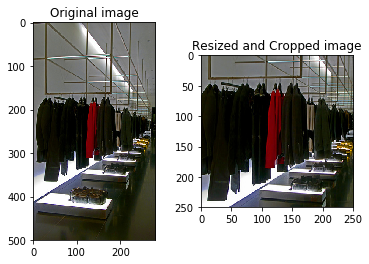

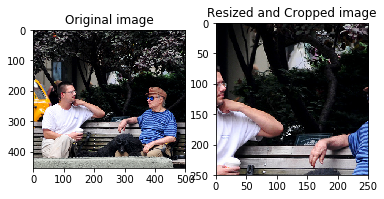

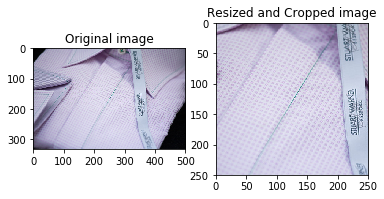

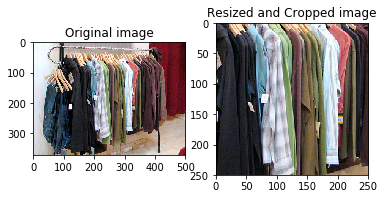

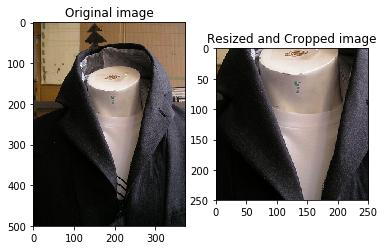

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize

#your path 
men_dir = 'men_clothing/*.JPEG'
women_dir = 'women_clothing/*.JPEG'

#creating a collection with the available images
men = imread_collection(men_dir)
women = imread_collection(women_dir)

#resize and crop images
#ref: http://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html#sphx-glr-auto-examples-transform-plot-rescale-py
for i in range(5):
    
    img = col[i]
    width,height,a = img.shape
    new_width,new_height = 250,250
    
    #crop image
    left = int((width - new_width)/2)
    right = int((width + new_width)/2)
    top = int((height - new_height)/2)
    bottom = int((height + new_height)/2)
    
    crop_img = img[left:right,top:bottom]
    
    #resize image
    resized = resize(crop_img,(new_height,new_width))
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Original image")

    ax[1].imshow(resized)
    ax[1].set_title("Resized and Cropped image")
    
    

In [14]:
from sklearn.decomposition import PCA

from PIL import Image
STANDARD_SIZE = (250,250)

def image_from_component(component):
    """
    reshapes flattened array into RGB image
    adapted from: https://github.com/joelgrus/shirts/blob/master/visuals.py
    """
    hi = max(component)
    lo = min(component)
    n = int(len(component) / 3)
    def rescale(x):
        return int(255 * (x - lo) / (hi - lo))
    d = [(rescale(component[3 * i]),
          rescale(component[3 * i + 1]),
          rescale(component[3 * i + 2])) for i in range(n)]
    im = Image.new('RGB',STANDARD_SIZE)
    im.putdata(d)
    return im

men_reshaped = []
women_reshaped = []

for i in range(500):
    #reshape image
    men_reshaped.append(resize(men[i],(250,250)).flatten())
    women_reshaped.append(resize(women[i],(250,250)).flatten())
    
men_arr = np.array(men_reshaped)
women_arr = np.array(women_reshaped)


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


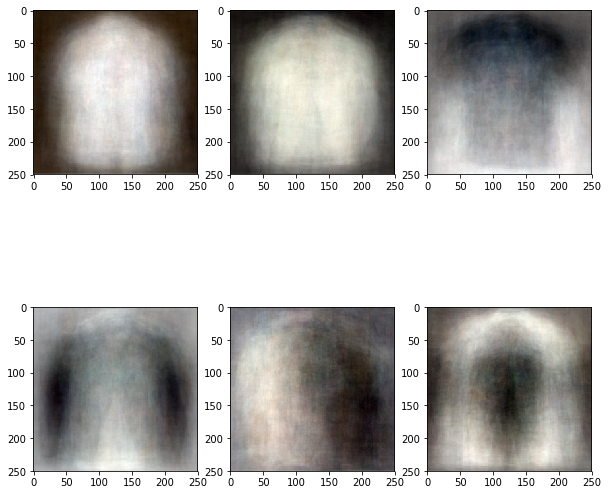

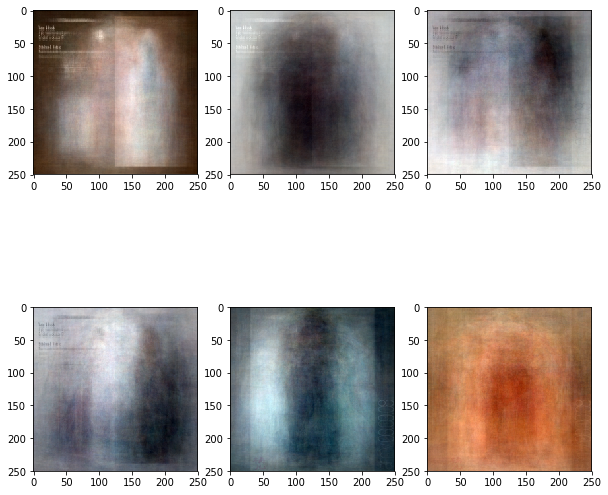

In [36]:
men_pca = PCA(n_components=6, svd_solver='randomized',whiten=True).fit(men_reshaped)
women_pca = PCA(n_components=6, svd_solver='randomized',whiten=True).fit(women_reshaped)

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i + 1)
    out = image_from_component(men_pca.components_[i,:])
    plt.imshow(out,interpolation='nearest')
    
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i + 1)
    out = image_from_component(women_pca.components_[i,:])
    plt.imshow(out,interpolation='nearest')

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

men_label = np.ones(500)
women_label = np.zeros(500)

X = np.concatenate((men_arr, women_arr), axis=0)
y = np.concatenate((men_label, women_label), axis=0)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify = y)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

lda = LDA(n_components=1000)  
X_lda = lda.fit_transform(X_train, y_train)  
lda_score = lda.score(X_train,y_train) 
    
print(lda_score)

(800, 187500) (800,) (200, 187500) (200,)


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9075
